In [ ]:
# Import packages
!pip install tweepy==4.9.0
import tweepy    # to access the Twitter API(Application Programming Interface)) with Python
import pandas as pd  # to make working with “relational” or “labeled” 
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob  #for processing textual data
import nltk    #human language data for applying in statistical NLP
nltk.download('vader_lexicon')  # attuned to sentiments expressed in social media.
#VADER ( Valence Aware Dictionary for Sentiment Reasoning) is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion
import numpy as np  # for working with arrays
from PIL import Image  #provides the python interpreter with image editing capabilities
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt  #to create graphs and figures

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 5.2 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: tweepy
    Found existing installation: tweepy 3.10.0
    Uninstalling tweepy-3.10.0:
      Successfully uninstalled tweepy-3.10.0


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
#bearer token from induviduals personal verified account
client = tweepy.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAABSwhAEAAAAAXPJ0Yxg%2BsQ79Ao1xL42oe6AdxSc%3DKBNHGV11Y6KC0b0vjwNRy98MVUp4gfgGMaMAh5Waog8WmcJ1jo')

In [ ]:
# Pulling tweets from twitter using keyword
query = '#stampede -is:retweet lang:en'
paginator = tweepy.Paginator(
client.search_recent_tweets,   
query=query,                  
max_results=100,               # how many tweets per page
limit=10                       # how many pages to retrieve
)
# Printing the pulled tweets
tweet_list = []
for tweet in paginator.flatten(): # Total number of tweets to be retrieved
 tweet_list.append(tweet)
print(tweet)

#BREAKING: #SouthKorea is in trouble said thousands of people have breathing problems after the #stampede at Itaewon in #Seoul, #PrayForSouthKorea #SouthKorea https://t.co/GVpbZnePx9


In [ ]:
#Creating new dataframe(table) with sr no and text
tweet_list_df = pd.DataFrame(tweet_list)
tweet_list_df = pd.DataFrame(tweet_list_df['text'])
tweet_list_df.head(20)   ##displays the first 20 tweets

,text
0,Protect yourself in a #STAMPEDE situation! htt...
1,"Finally escaped the deadly COVID-19, but they ..."
2,@UnderValued @3L3NFT Lets goooo #Stomp #Stampe...
3,STEP 1: Don't allow yourself to be part of a l...
4,More names ravealed #Iteawon #Halloween #stamp...
5,This video should be shown on every channel ar...
6,Many #SouthKorean officials apologized for the...
7,Dubbed one of the worst peacetime disasters in...
8,#Crowdcrushes: how disasters like Itaewon happ...
9,@brookmans76 @ProbstKA @ChrisSweens1 @morr316 ...


In [ ]:
def preprocess_tweet(sen):     #takes text string as a parameter to remove unwanted characters
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only in lowercase'''
    sentence = sen.lower()     #converting all words to lowercase
    # Remove Retweets
    sentence = re.sub('RT @\w+: '," ", sentence)
    # Remove punctuations and numbers
    sentence = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", sentence)
    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence) 
    return sentence

In [ ]:
cleaned_tweets = []
for tweet in tweet_list_df['text']:
    cleaned_tweet = preprocess_tweet(tweet)  
    cleaned_tweets.append(cleaned_tweet)
tweet_list_df['cleaned'] = pd.DataFrame(cleaned_tweets)
tweet_list_df.head(20)  #displays the first 20 tweets

,text,cleaned
0,Protect yourself in a #STAMPEDE situation! htt...,protect yourself in stampede situation
1,"Finally escaped the deadly COVID-19, but they ...",finally escaped the deadly covid 19 but they f...
2,@UnderValued @3L3NFT Lets goooo #Stomp #Stampe...,lets goooo stomp stampede
3,STEP 1: Don't allow yourself to be part of a l...,step 1 don allow yourself to be part of large ...
4,More names ravealed #Iteawon #Halloween #stamp...,more names ravealed iteawon halloween stampede...
5,This video should be shown on every channel ar...,this video should be shown on every channel ar...
6,Many #SouthKorean officials apologized for the...,many southkorean officials apologized for the ...
7,Dubbed one of the worst peacetime disasters in...,dubbed one of the worst peacetime disasters in...
8,#Crowdcrushes: how disasters like Itaewon happ...,crowdcrushes how disasters like itaewon happe...
9,@brookmans76 @ProbstKA @ChrisSweens1 @morr316 ...,even from stampede separate results for m1a p...


In [ ]:
#Calculating Negative, Positive, Neutral and Compound values
#polarity lies between [-1,1], -1 defines a negative sentiment and 1 defines a positive sentiment
#Subjectivity quantifies the amount of personal opinion and factual information contained in the text
#The higher subjectivity means that the text contains personal opinion rather than factual information
#subjectivity lies between [0,1]
#The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive
#positive-Amazing—after years of attacking Donald Trump the media managed to turn #InaugurationDay into all about themselves.
tweet_list_df[['polarity', 'subjectivity']] = tweet_list_df['cleaned'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tweet_list_df['cleaned'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if comp <= -0.05:
        tweet_list_df.loc[index, 'sentiment'] = "negative"
    elif comp >= 0.05:
        tweet_list_df.loc[index, 'sentiment'] = "positive"
    else:
        tweet_list_df.loc[index, 'sentiment'] = "neutral"
    
    tweet_list_df.loc[index, 'neg'] = neg
    tweet_list_df.loc[index, 'neu'] = neu
    tweet_list_df.loc[index, 'pos'] = pos
    tweet_list_df.loc[index, 'compound'] = comp
tweet_list_df.head(20)

,text,cleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,Protect yourself in a #STAMPEDE situation! htt...,protect yourself in stampede situation,0.000000,0.000000,negative,0.333,0.357,0.310,-0.0516
1,"Finally escaped the deadly COVID-19, but they ...",finally escaped the deadly covid 19 but they f...,-0.043838,0.637778,positive,0.086,0.579,0.336,0.8957
2,@UnderValued @3L3NFT Lets goooo #Stomp #Stampe...,lets goooo stomp stampede,0.000000,0.000000,negative,0.483,0.517,0.000,-0.4215
3,STEP 1: Don't allow yourself to be part of a l...,step 1 don allow yourself to be part of large ...,0.214286,0.428571,negative,0.190,0.680,0.129,-0.2263
4,More names ravealed #Iteawon #Halloween #stamp...,more names ravealed iteawon halloween stampede...,0.500000,0.500000,negative,0.118,0.882,0.000,-0.4215
5,This video should be shown on every channel ar...,this video should be shown on every channel ar...,0.000000,0.000000,negative,0.302,0.698,0.000,-0.7783
6,Many #SouthKorean officials apologized for the...,many southkorean officials apologized for the ...,0.150000,0.250000,negative,0.169,0.795,0.036,-0.6124
7,Dubbed one of the worst peacetime disasters in...,dubbed one of the worst peacetime disasters in...,-0.100000,0.700000,negative,0.317,0.553,0.130,-0.8316
8,#Crowdcrushes: how disasters like Itaewon happ...,crowdcrushes how disasters like itaewon happe...,0.000000,0.000000,negative,0.305,0.524,0.171,-0.5859
9,@brookmans76 @ProbstKA @ChrisSweens1 @morr316 ...,even from stampede separate results for m1a p...,0.000000,0.000000,negative,0.177,0.823,0.000,-0.4215


In [ ]:
#Creating new dataframes for all sentiments (positive, negative and neutral)
tweet_list_df_negative = tweet_list_df[tweet_list_df["sentiment"]=="negative"]
tweet_list_df_positive = tweet_list_df[tweet_list_df["sentiment"]=="positive"]
tweet_list_df_neutral = tweet_list_df[tweet_list_df["sentiment"]=="neutral"]

In [ ]:
#Function for count_values_in single columns
def count_values_in_column(data,feature):
    total = data.loc[:,feature].value_counts(dropna=False)    #dropna() method removes the rows that contains NULL values
    percentage = round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tweet_list_df,"sentiment")

,Total,Percentage
negative,930,93.0
positive,61,6.1
neutral,9,0.9


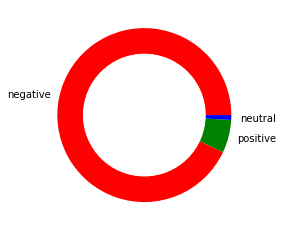

In [ ]:
# creating data for Pie Chart
pichart = count_values_in_column(tweet_list_df,"sentiment")

names= pichart.index
size=pichart["Percentage"]
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['red','green','blue'])  #adding colours in the piechart
p=plt.gcf()  #used to get the current figure
p.gca().add_artist(my_circle) #p.gca is to get the current axes
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Function to Create Wordcloud
def create_wordcloud(text):
    mask = np.array(Image.open("/content/drive/MyDrive/cloud.png")) #path the cloud.png file saved in google drive
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                    mask = mask,
                    max_words=100,
                    stopwords=stopwords,
                    repeat=True)
    wc.generate(str(text))
    wc.to_file("c1_wordcloud.png")
    print("Word Cloud Saved Successfully")
    path="/content/drive/MyDrive/cloud.png"
    display(Image.open(path))

In [ ]:
from google.colab import drive  #mounting google colab with drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Function to Create Wordcloud
def create_wordcloud(text):
 mask = np.array(Image.open("/content/drive/MyDrive/cloud.png"))
 stopwords = set(STOPWORDS) # removing stopwords
 wc = WordCloud(background_color="white",
 mask = mask,
 max_words=3000,
 stopwords=stopwords,
 repeat=True)
 wc.generate(str(text))
 wc.to_file("wc.png")
 print("Word Cloud Saved Successfully")
 path="wc.png"
 display(Image.open(path))

Word Cloud Saved Successfully


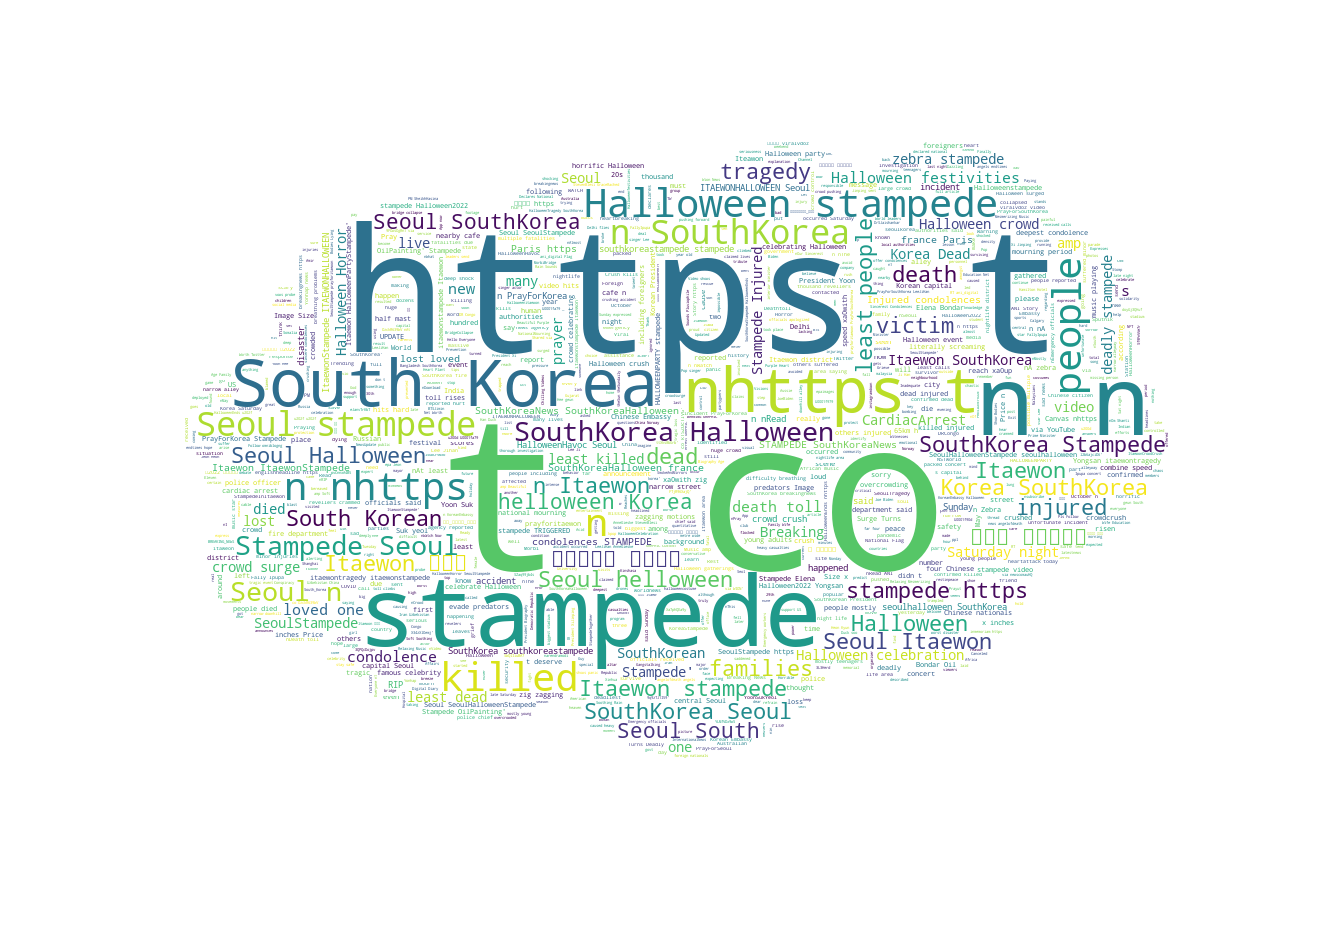

In [ ]:
#Creating wordcloud for all tweets
create_wordcloud(tweet_list_df["text"].values)


Word Cloud Saved Successfully


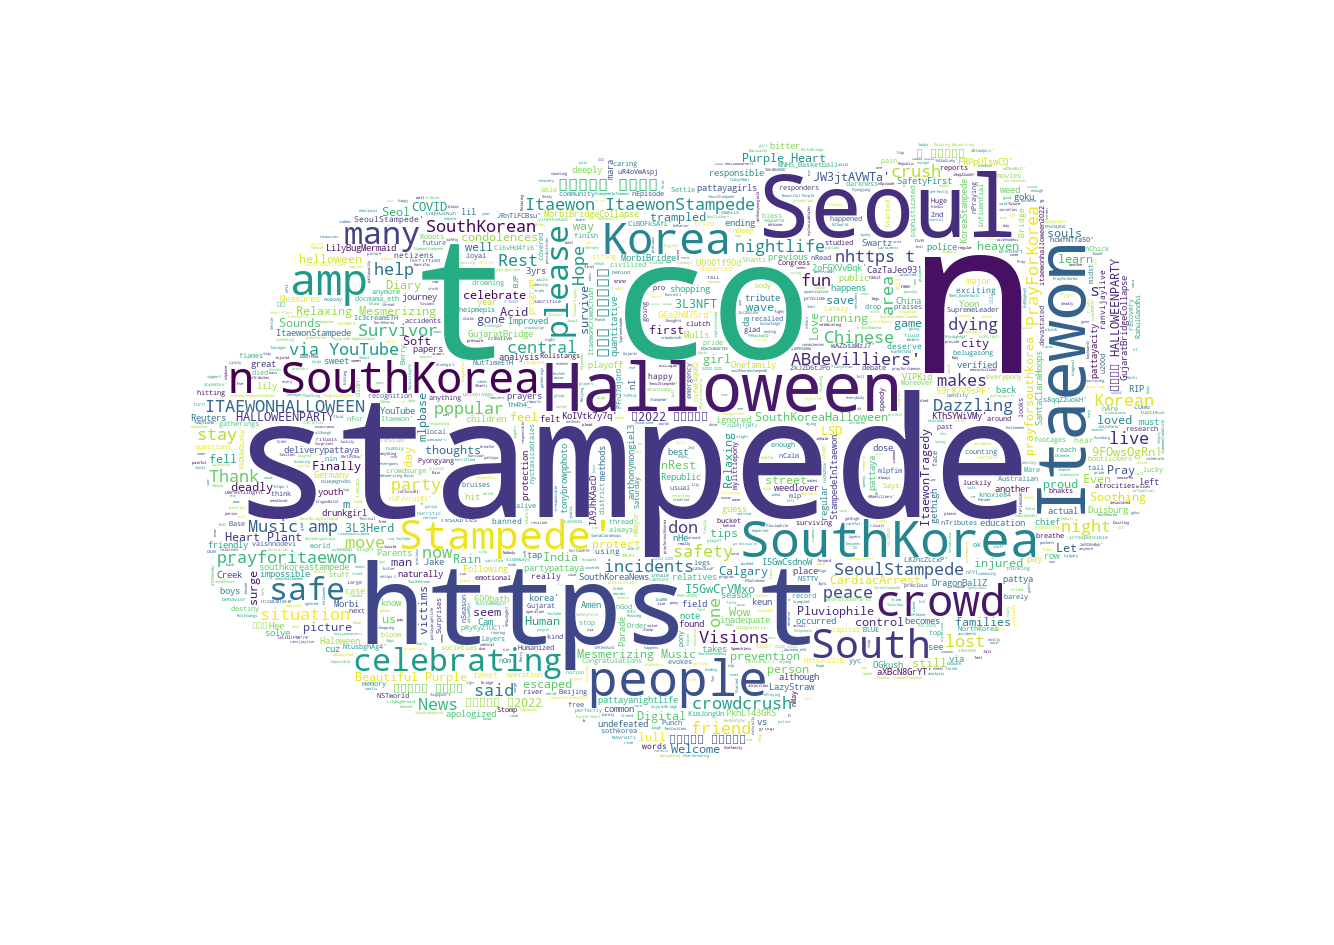

In [ ]:
#Creating wordcloud for positive sentiment
create_wordcloud(tweet_list_df_positive["text"].values)


Word Cloud Saved Successfully


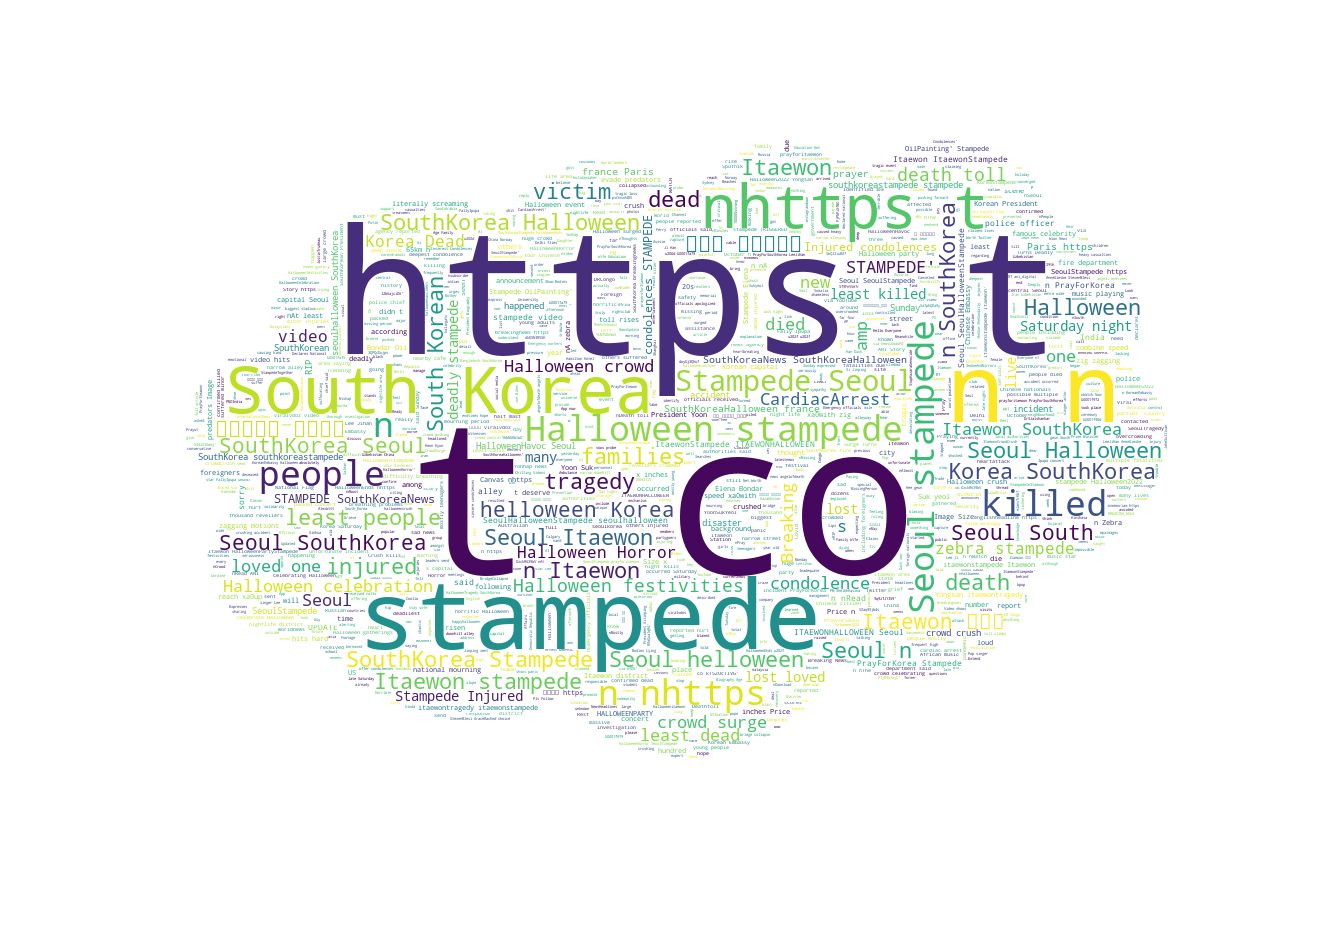

In [ ]:
#Creating wordcloud for negative sentiment
create_wordcloud(tweet_list_df_negative["text"].values)


In [ ]:
#Calculating tweet's lenght and word count
tweet_list_df['text_len'] = tweet_list_df['cleaned'].astype(str).apply(len)
tweet_list_df['text_word_count'] = tweet_list_df['cleaned'].apply(lambda x: len(str(x).split()))


In [ ]:
#rounds the values in the DataFrame into numbers with the specified number of decimals
round(pd.DataFrame(tweet_list_df.groupby("sentiment").text_len.mean()),4)    
round(pd.DataFrame(tweet_list_df.groupby("sentiment").text_word_count.mean()),4)

,text_word_count
sentiment,
negative,25.5968
neutral,27.7778
positive,24.9344


In [ ]:
tweet_list_df_positive


,text,cleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound
1,"Finally escaped the deadly COVID-19, but they ...",finally escaped the deadly covid 19 but they f...,-0.043838,0.637778,positive,0.086,0.579,0.336,0.8957
18,#Chinese celebrate #MorbiBridgeCollapse in #In...,chinese celebrate morbibridgecollapse in indi...,0.000000,0.000000,positive,0.119,0.723,0.157,0.2263
19,LSD Acid 1tap /600bath dose to heaven 😊🤙 hit m...,lsd acid 1tap 600bath dose to heaven hit me up...,0.000000,0.000000,positive,0.080,0.826,0.094,0.1280
46,"What a great year, another undefeated regular ...",what great year another undefeated regular sea...,0.181250,0.484615,positive,0.136,0.688,0.176,0.5106
53,Following are the some ways or safety tips in ...,following are the some ways or safety tips in ...,0.031250,0.300000,positive,0.193,0.588,0.219,0.2500
...,...,...,...,...,...,...,...,...,...
859,#youtube #stampede during #Halloween festiviti...,youtube stampede during halloween festivities...,0.000000,0.000000,positive,0.235,0.504,0.261,0.0772
874,"If you ever are in a situation like this, plea...",if you ever are in situation like this please ...,0.700000,0.600000,positive,0.065,0.602,0.334,0.8916
892,Speechless….🖤😔🇰🇷 May their souls Rest in Peace...,speechless may their souls rest in peace itaew...,0.000000,0.000000,positive,0.162,0.636,0.202,0.1779
912,It’s heartbreaking to watch all the videos and...,it heartbreaking to watch all the videos and p...,0.500000,0.500000,positive,0.144,0.594,0.262,0.5859


In [ ]:
tweet_list_df_negative

,text,cleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,Protect yourself in a #STAMPEDE situation! htt...,protect yourself in stampede situation,0.000000,0.000000,negative,0.333,0.357,0.310,-0.0516
2,@UnderValued @3L3NFT Lets goooo #Stomp #Stampe...,lets goooo stomp stampede,0.000000,0.000000,negative,0.483,0.517,0.000,-0.4215
3,STEP 1: Don't allow yourself to be part of a l...,step 1 don allow yourself to be part of large ...,0.214286,0.428571,negative,0.190,0.680,0.129,-0.2263
4,More names ravealed #Iteawon #Halloween #stamp...,more names ravealed iteawon halloween stampede...,0.500000,0.500000,negative,0.118,0.882,0.000,-0.4215
5,This video should be shown on every channel ar...,this video should be shown on every channel ar...,0.000000,0.000000,negative,0.302,0.698,0.000,-0.7783
...,...,...,...,...,...,...,...,...,...
995,#SouthKorea This is so tragic 😓\n#Halloween #S...,southkorea this is so tragic halloween southk...,-0.750000,0.750000,negative,0.526,0.474,0.000,-0.7695
996,"#Watch | Many crushed to death, dozens in card...",watch many crushed to death dozens in cardiac...,0.160000,0.220000,negative,0.481,0.519,0.000,-0.9556
997,#SouthKorea's fire department said 81 people h...,southkorea fire department said 81 people hav...,0.500000,0.500000,negative,0.203,0.797,0.000,-0.7845
998,At least 146 dead and scores critical after #S...,at least 146 dead and scores critical after se...,-0.166667,0.533333,negative,0.485,0.515,0.000,-0.8555


In [ ]:

tweet_list_df_negative = tweet_list_df[tweet_list_df["sentiment"]=="negative"]
tweet_list_df_positive = tweet_list_df[tweet_list_df["sentiment"]=="positive"]
tweet_list_df_neutral = tweet_list_df[tweet_list_df["sentiment"]=="neutral"] 

In [ ]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [ ]:
count_values_in_column(tweet_list_df,"sentiment")


,Total,Percentage
negative,930,93.0
positive,61,6.1
neutral,9,0.9


In [ ]:
import string


In [ ]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tweet_list_df['punct'] =tweet_list_df['text'].apply(lambda x: remove_punct(x))

In [ ]:
#Appliyng tokenization
#splitting a string, text into a list of tokens
#help in understanding the context or developing the model for the NLP
def tokenization(text):
    text = re.split('\W+', text)
    return text

tweet_list_df['tokenized'] = tweet_list_df['punct'].apply(lambda x: tokenization(x.lower()))

In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Removing stopwords because they carry very little useful information
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tweet_list_df['nonstop'] = tweet_list_df['tokenized'].apply(lambda x: remove_stopwords(x))

In [ ]:
#Appliyng Stemmer
#reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words 
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tweet_list_df['stemmed'] = tweet_list_df['nonstop'].apply(lambda x: stemming(x))

In [ ]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [ ]:
tweet_list_df.head(10 )


,text,cleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,Protect yourself in a #STAMPEDE situation! htt...,protect yourself in stampede situation,0.000000,0.000000,negative,0.333,0.357,0.310,-0.0516,39,5,Protect yourself in a STAMPEDE situation https...,"[protect, yourself, in, a, stampede, situation...","[protect, stampede, situation, httpstcowlcaopo]","[protect, stamped, situat, httpstcowlcaopo]"
1,"Finally escaped the deadly COVID-19, but they ...",finally escaped the deadly covid 19 but they f...,-0.043838,0.637778,positive,0.086,0.579,0.336,0.8957,199,30,Finally escaped the deadly COVID but they fina...,"[finally, escaped, the, deadly, covid, but, th...","[finally, escaped, deadly, covid, finally, fel...","[final, escap, deadli, covid, final, fell, cro..."
2,@UnderValued @3L3NFT Lets goooo #Stomp #Stampe...,lets goooo stomp stampede,0.000000,0.000000,negative,0.483,0.517,0.000,-0.4215,27,4,UnderValued LNFT Lets goooo Stomp Stampede 🐘🥜,"[undervalued, lnft, lets, goooo, stomp, stampe...","[undervalued, lnft, lets, goooo, stomp, stampe...","[undervalu, lnft, let, goooo, stomp, stamped, ]"
3,STEP 1: Don't allow yourself to be part of a l...,step 1 don allow yourself to be part of large ...,0.214286,0.428571,negative,0.190,0.680,0.129,-0.2263,72,13,STEP Dont allow yourself to be part of a larg...,"[step, dont, allow, yourself, to, be, part, of...","[step, dont, allow, part, large, crowd, crowdc...","[step, dont, allow, part, larg, crowd, crowdcr..."
4,More names ravealed #Iteawon #Halloween #stamp...,more names ravealed iteawon halloween stampede...,0.500000,0.500000,negative,0.118,0.882,0.000,-0.4215,248,22,More names ravealed Iteawon Halloween stampede...,"[more, names, ravealed, iteawon, halloween, st...","[names, ravealed, iteawon, halloween, stampede...","[name, raveal, iteawon, halloween, stamped, cr..."
5,This video should be shown on every channel ar...,this video should be shown on every channel ar...,0.000000,0.000000,negative,0.302,0.698,0.000,-0.7783,132,21,This video should be shown on every channel ar...,"[this, video, should, be, shown, on, every, ch...","[video, shown, every, channel, around, world, ...","[video, shown, everi, channel, around, world, ..."
6,Many #SouthKorean officials apologized for the...,many southkorean officials apologized for the ...,0.150000,0.250000,negative,0.169,0.795,0.036,-0.6124,257,41,Many SouthKorean officials apologized for the ...,"[many, southkorean, officials, apologized, for...","[many, southkorean, officials, apologized, sta...","[mani, southkorean, offici, apolog, stamped, k..."
7,Dubbed one of the worst peacetime disasters in...,dubbed one of the worst peacetime disasters in...,-0.100000,0.700000,negative,0.317,0.553,0.130,-0.8316,198,33,Dubbed one of the worst peacetime disasters in...,"[dubbed, one, of, the, worst, peacetime, disas...","[dubbed, one, worst, peacetime, disasters, sou...","[dub, one, worst, peacetim, disast, south, kor..."
8,#Crowdcrushes: how disasters like Itaewon happ...,crowdcrushes how disasters like itaewon happe...,0.000000,0.000000,negative,0.305,0.524,0.171,-0.5859,96,15,Crowdcrushes how disasters like Itaewon happen...,"[crowdcrushes, how, disasters, like, itaewon, ...","[crowdcrushes, disasters, like, itaewon, happe...","[crowdcrush, disast, like, itaewon, happen, pr..."
9,@brookmans76 @ProbstKA @ChrisSweens1 @morr316 ...,even from stampede separate results for m1a p...,0.000000,0.000000,negative,0.177,0.823,0.000,-0.4215,82,14,brookmans ProbstKA ChrisSweens morr Even from ...,"[brookmans, probstka, chrissweens, morr, even,...","[brookmans, probstka, chrissweens, morr, even,...","[brookman, probstka, chrissween, morr, even, s..."


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
#Appliyng Countvectorizer
#transform a given text into a vector on the basis of the frequency  of each word that occurs in the entire tweet
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tweet_list_df['text'])
print('{} Number of tweets has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

1000 Number of tweets has 3349 words


In [ ]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()
#this will produce a sparse matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,aajtak,aarbi,abc,abcnew,abdevilli,abdullah,abe,abil,abl,...,영상,오이지젤생일아인교,이태원,이태원사고,이태원참사,지구에서년지성아환영해,할로윈,𝘼𝘾𝙏𝙐𝘼𝙇,𝙊𝙁,𝙍𝙀𝘼𝙇𝙄𝙏𝙔
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
seoul,836
halloween,772
southkorea,522
itaewon,477
korea,432
south,351
peopl,322
kill,238
least,192
crowd,170


An N-gram means a sequence of N words

In [ ]:
#s predict the occurrence of a word based on its previous word
#used for language independence
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
#n2_bigram
n2_bigrams = get_top_n_gram(tweet_list_df['text'],(2,2),20)

n2_bigrams

[('south korea', 285),
 ('halloween stampede', 208),
 ('stampede seoul', 202),
 ('stampede https', 150),
 ('seoul stampede', 139),
 ('stampede halloween', 125),
 ('southkorea halloween', 108),
 ('southkorea stampede', 108),
 ('seoul itaewon', 108),
 ('seoul halloween', 93),
 ('itaewon stampede', 78),
 ('stampede itaewon', 74),
 ('korea southkorea', 66),
 ('이태원 이태원사고', 65),
 ('이태원사고 압사사고', 61),
 ('seoul southkorea', 60),
 ('southkorea seoul', 59),
 ('seoul helloween', 58),
 ('itaewon 이태원', 58),
 ('helloween korea', 57)]

In [ ]:
#n3_trigram
n3_trigrams = get_top_n_gram(tweet_list_df['text'],(3,3),20)

n3_trigrams

[('이태원 이태원사고 압사사고', 61),
 ('stampede seoul helloween', 58),
 ('itaewon 이태원 이태원사고', 58),
 ('seoul helloween korea', 57),
 ('helloween korea southkorea', 57),
 ('seoul itaewon 이태원', 53),
 ('seoul south korea', 48),
 ('families lost loved', 45),
 ('lost loved ones', 45),
 ('southkorea halloween seoul', 43),
 ('seoul halloween stampede', 39),
 ('south korea stampede', 38),
 ('korea southkorea halloween', 37),
 ('stampede 150 injured', 35),
 ('halloween seoul itaewon', 35),
 ('condolences families lost', 34),
 ('halloween stampede https', 33),
 ('horror south korea', 33),
 ('south korea 149', 33),
 ('149 dead stampede', 33)]